Markdown basics (http://daringfireball.net/projects/markdown/basics)
# NY Taxi Rides

### Data Provided by the New York City Taxi and Limousine Commission.
Full dataset is 170 million taxi trips, 100GB of free space. Our subset is 0.5% of all trips, about 850,000 rides. Download the dataset from Cyrille Rossant on GitHub: https://github.com/ipython-books/minibook-2nd-data (https://github.com/ipython-books/minibook-2nd-data) NYC Taxi & Limousine Commission website (http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml) NYC Gov data description website (http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)


In [126]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import statistics
%matplotlib inline


In [99]:
#put your path here.

data_filename = '/Users/josephgilbride/Downloads/data/nyc_data.csv'
data_filename2 = '/Users/josephgilbride/Downloads/data/nyc_fare.csv'

In [100]:
data = pd.read_csv(data_filename, 
                   parse_dates=['pickup_datetime', 'dropoff_datetime'] )
data2 = pd.read_csv(data_filename2)
#pd.read_csv?

head() method of DataFrames displays the first three lines of the table

In [6]:
data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,1,NaN,2013-01-01 00:00:00,2013-01-01 00:05:00,3,300,0.61,-73.955925,40.781887,-73.963181,40.777832
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,1,NaN,2013-01-01 00:05:00,2013-01-01 00:21:00,1,960,3.28,-74.005501,40.745735,-73.964943,40.755722
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,1,N,2013-01-01 00:05:52,2013-01-01 00:12:18,1,386,1.50,-73.969955,40.799770,-73.954567,40.787392
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:06:00,6,0,0.00,-73.991432,40.755081,-73.991417,40.755085
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,1,NaN,2013-01-01 00:06:00,2013-01-01 00:12:00,2,360,1.31,-73.966225,40.773716,-73.955399,40.782597


In [188]:
data2.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,76942C3205E17D7E7FE5A9F709D16434,25BA06A87905667AA1FE5990E33F0E2E,VTS,2013-01-01 00:00:00,CSH,5.0,0.5,0.5,0.0,0.0,6.0
1,517C6B330DBB3F055D007B07512628B3,2C19FBEE1A6E05612EFE4C958C14BC7F,VTS,2013-01-01 00:05:00,CRD,13.5,0.5,0.5,2.8,0.0,17.3
2,ED15611F168E41B33619C83D900FE266,754AEBD7C80DA17BA1D81D89FB6F4D1D,CMT,2013-01-01 00:05:52,CSH,7.5,0.5,0.5,0.0,0.0,8.5
3,B33E704CC189E80C9671230C16527BBC,6789C77E1CBDC850C450D72204702976,VTS,2013-01-01 00:06:00,CSH,2.5,0.5,0.5,0.0,0.0,3.5
4,BD5CC6A22D05EB2D5C8235526A2A4276,5E8F2C93B5220A922699FEBAFC2F7A54,VTS,2013-01-01 00:06:00,CSH,6.5,0.5,0.5,0.0,0.0,7.5


In [186]:
summary = data.describe()
summary

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,846945.000000,846945.000000,8.469450e+05,8.469450e+05,846945.000000,846945.000000,846945.000000,846945.000000
mean,1.026123,1.710272,8.125239e+02,9.958211e+00,-73.975155,40.750490,-73.974197,40.750967
std,0.223480,1.375266,1.609831e+04,6.525205e+03,0.035142,0.027224,0.033453,0.030766
min,0.000000,0.000000,-1.000000e+01,0.000000e+00,-74.098305,40.009911,-74.099998,40.009911
25%,1.000000,1.000000,3.610000e+02,1.050000e+00,-73.992371,40.736031,-73.991570,40.735207
50%,1.000000,1.000000,6.000000e+02,1.800000e+00,-73.982094,40.752975,-73.980614,40.753597
75%,1.000000,2.000000,9.600000e+02,3.200000e+00,-73.968048,40.767460,-73.965157,40.768227
max,6.000000,6.000000,4.294796e+06,6.005123e+06,-73.028473,40.996132,-73.027061,40.998592


In [187]:
summary2 = data2.describe()
summary2

,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,846945.000000,846945.000000,846945.000000,846945.00000,846945.000000,846945.000000
mean,12.190578,0.320303,0.499305,1.34466,0.232142,14.587073
std,9.514150,0.772642,0.057844,2.09149,1.109164,11.380950
min,-648.420000,-1.000000,-0.500000,0.00000,0.000000,-52.500000
25%,6.500000,0.000000,0.500000,0.00000,0.000000,8.000000
50%,9.500000,0.000000,0.500000,1.00000,0.000000,11.000000
75%,14.000000,0.500000,0.500000,2.00000,0.000000,16.500000
max,620.010000,628.840000,41.490000,200.00000,100.660000,620.010000


In [198]:
data.dtypes

medallion           object
hack_license        object
vendor_id           object
pickup_datetime     object
payment_type        object
fare_amount        float64
surcharge          float64
mta_tax            float64
tip_amount         float64
tolls_amount       float64
total_amount       float64
dtype: object

In [199]:
data2.dtypes

medallion           object
hack_license        object
vendor_id           object
pickup_datetime     object
payment_type        object
fare_amount        float64
surcharge          float64
mta_tax            float64
tip_amount         float64
tolls_amount       float64
total_amount       float64
dtype: object

Get the actual coordinates: four DataFrame columns
These four variables are all Series objects:

In [ ]:
p_lng = data.pickup_longitude
p_lat = data.pickup_latitude
d_lng = data.dropoff_longitude
d_lat = data.dropoff_latitude

In [ ]:
# a Series is an indexed list of values.
p_lng.head()

In [ ]:
p_lat.head()

In [16]:
# Get the coordinates of points in pixels from geographical coordinates.
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

In [ ]:
lat_lng_to_pixels(40.781887, -73.955925)

In [1]:
# Get pickup coordinates from pickup latitude and longitude
px, py = lat_lng_to_pixels(p_lat, p_lng)
py.head()

NameError: name 'lat_lng_to_pixels' is not defined

Display a scatter plot of pickup locations
Matplotlib scatter function makes a scatter plot of x vs y, where x and y are sequence like objects of the same
length.
Documentation: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
(http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)

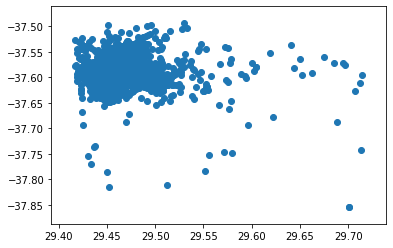

In [16]:
plt.scatter(px, py)

### Customize our plot:
- Make markers smaller
- Make fewer points by making some points transparent
- Zoom in around Manhattan
- Make figure bigger
- Don't display the axes

plt or matplotlib.pyplot is a collection of command style functions. Each pyplot function makes some change to
a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates
the plot with labels, etc. ...

(29.4, 29.55, -37.63, -37.54)

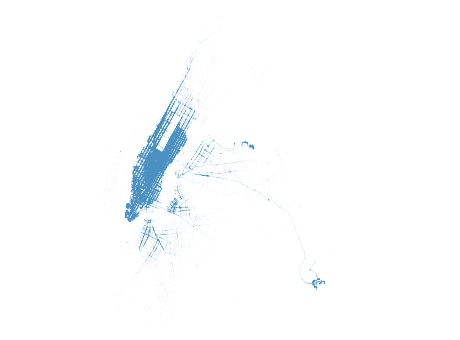

In [32]:
# Specify the figure size
plt.figure(figsize=(8, 6))
# s argument is used to make the marker size smaller
# alpha specifies opacity
plt.scatter(px, py, s=.1, alpha=0.03)
# equal aspect ratio
plt.axis('equal')
# zoom in
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
# remove the axes
plt.axis('off')

## Display a histogram of the trip distances.
pandas Series hist() draws histogram of the input Series using Matplotlib: documentation
(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html).

Manhattan Island is 13.4 miles long and 2.3 miles wide.

What is a histogram? (https://statistics.laerd.com/statistical-guides/understanding-histograms.php)
numpy linspace() returns evenly spaced numbers over a specified interval.
Parameters: start - interval start; stop - interval stop; num - number of numbers. numpy linspace()
documentation (https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)


In [120]:
bin_array = np.linspace(start=0., stop=10., num=100)

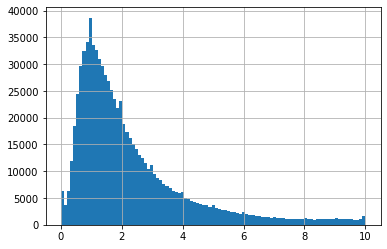

In [121]:
data.trip_distance.hist(bins=bin_array)

## Filtering with boolean indexing
### Select long rides

data.loc[data.trip_distance > 100]

In [212]:
#1) #Creating vendor_id dataframe
vendor_df = data[['vendor_id', 'pickup_longitude', 'pickup_latitude']]

#Creating RGBA values for vendor_id
df = vendor_df.replace(to_replace ='VTS', value= 'red', regex = True)
df2 = df.replace(to_replace ='CMT', value= 'green', regex = True)

In [213]:
#Converting to pixels
p_lon = data.pickup_longitude
p_lat = data.pickup_latitude 
px, py = lat_lng_to_pixels(p_lat, p_lon)

(29.4, 29.55, -37.63, -37.54)

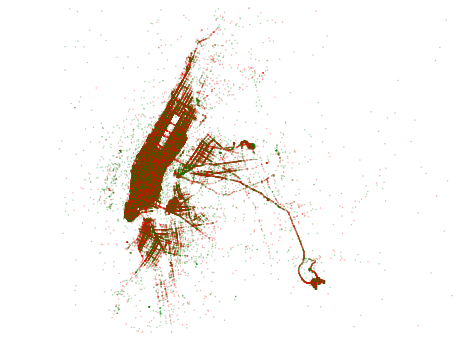

In [214]:
#Displaying heatmap of pickups -- (easier to find CMT cab)

plt.figure(figsize=(8, 6))
plt.scatter(px, py, color=df2.vendor_id, s=.1, alpha=.5)
plt.axis('equal')
plt.xlim(29.40, 29.55)
plt.ylim(-37.63, -37.54)
plt.axis('off')

In [215]:
statistics.mode(df2.vendor_id)

'green'

1.0

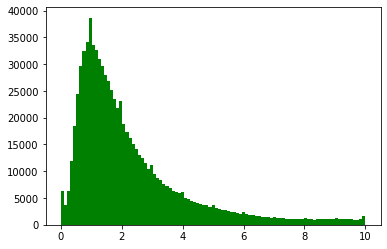

In [155]:
#2) Trip distance mode = 1 mile

data.trip_distance.hist(bins=bin_array, grid=False, color='green')
statistics.mode(data.trip_distance)

9.0

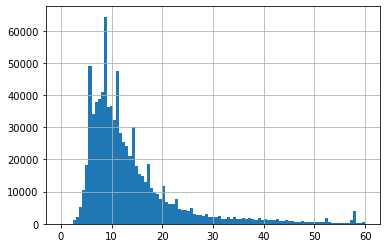

In [150]:
#3) Trip fare histogram -- 
        ## most trips cost about $9
        ## the base price of a trip is about $2.50, or where the data starts
        ## the difference between peaks indicates cost per mile (e.g. $13.50 - $11 = ~$2.50 per mile)

bin_array2 = np.linspace(start=0., stop = 60, num=100) 
data2.total_amount.hist(bins=bin_array2)
statistics.mode(data2.total_amount)

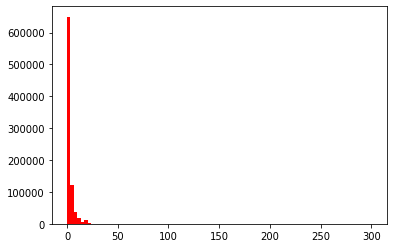

In [174]:
#4) 4 trips greater than 100 miles

bin_array3 = np.linspace(start=0., stop = 300, num=90) 
data.trip_distance.hist(bins=bin_array3, grid=False, color='red')


In [185]:
long_trips = data.trip_distance.sort_values(ascending = False) > 100
long_trips.value_counts()

False    846941
True          4
Name: trip_distance, dtype: int64